# Pràctica 3: Regressió Logistica


## Avaluació i entregues

### Entregues
Les pràctiques es realitzarán els divendres de 15:00 a 17:00. Cada setmana presentarem nous mètodes i algorismes vistos a la classe de teoria.

L'entrega, es realitzarà el següent dijous abans de les 23:59, és a dir, tindreu les hores de classe més tota una setmana per a realitzar les tasques. Es pujará un .ipynb ja executat, on no només hi hagi codi sinó també text explicatiu de gràfiques, resultats, i analisis. Tingueu en compte que no es valora tant la quantitat, sino la qualitat del que s'hi explica. Hem d'aprendre a extreure el gra de la palla i presentar-ho de forma correcta i concisa.


### Avaluació
Aquesta práctica será molt més dirigida que l'anterior. S'evaluarán els següents conceptes sobre una mateixa base de dades, que tractarà sobre els vins:

* A. Ús LogisticRegression (20%)
* B. Regularitzadors (40%)
* C. Demostració Error de Variance (20%)
* D. Demostració Error de Bias (20%)

A continuació veurem un exemple de regressió lineal, i com es comporta el regressor logistic.

(-3.0, 3.0)

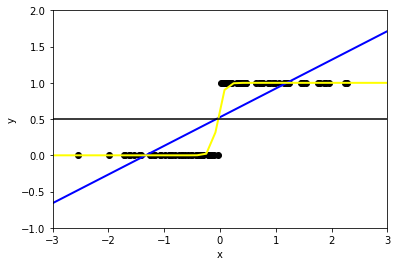

In [1]:
import numpy as np
from sklearn import linear_model
import matplotlib.pyplot as plt
 

def lr_model(x):
    return 1 / (1 + np.exp(-x))

xmin, xmax = -10, 10
np.random.seed(0)
X = np.random.normal(size = 100) 

y = (X > 0).astype(np.float) 
X = X[:, np.newaxis] 
X_test = np.linspace(-4, 4, 50)

# Linear Regression:
ols = linear_model.LinearRegression()
ols.fit(X, y)
plt.plot(X_test, ols.coef_ * X_test + ols.intercept_, color = 'blue', linewidth = 2)

# Logistic Regression:
clf = linear_model.LogisticRegression(C=1e2)
clf.fit(X, y)
loss = lr_model(X_test * clf.coef_ + clf.intercept_).ravel()
plt.plot(X_test, loss, color = 'yellow', linewidth = 2)
#loss = clf.predict_proba(X_test[:, np.newaxis])
#plt.plot(X_test, loss[:, 1], color = 'red', linewidth = 2)


plt.axhline(0.5, color = 'black')
plt.scatter(X, y, color = 'black')

plt.ylabel('y')
plt.xlabel('x')

plt.ylim(-1, 2)
plt.xlim(-3, 3)


Per cert, recordeu el què significa el error de Variança i el de bias.

<img src="bias_variance.png" width=600 height=600 />

In [2]:
# Codi esquelet per la pràctica de la 3 sessió: Regressió Logistica

import numpy as np
import pandas as pd
%matplotlib inline
from matplotlib import pyplot as plt
import seaborn as sns
sns.set_theme()


# Visualitzarem només 3 decimals per mostra, i definim el num de files i columnes a mostrar
pd.set_option('display.float_format', lambda x: '%.3f' % x)
pd.set_option('display.max_rows', 20)
pd.set_option('display.max_columns', 50)

# Funcio per a llegir dades en format csv
def load_dataset(path):
    dataset = pd.read_csv(path, header=0, delimiter=',')
    return dataset

# Carreguem dataset d'exemple
dataset = load_dataset('winequalityN.csv')
dataset = dataset.dropna()
dataset['is_red_wine'] = (dataset["type"] == 'red').astype(int)


print("Dimensionalitat de la BBDD:", dataset.shape)


Dimensionalitat de la BBDD: (6463, 14)


A continuació veurem algunes taules i gràfiques per entendre com són les dades que tenim:

In [3]:
display(dataset)

,type,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality,is_red_wine
0,white,7.000,0.270,0.360,20.700,0.045,45.000,170.000,1.001,3.000,0.450,8.800,6,0
1,white,6.300,0.300,0.340,1.600,0.049,14.000,132.000,0.994,3.300,0.490,9.500,6,0
2,white,8.100,0.280,0.400,6.900,0.050,30.000,97.000,0.995,3.260,0.440,10.100,6,0
3,white,7.200,0.230,0.320,8.500,0.058,47.000,186.000,0.996,3.190,0.400,9.900,6,0
4,white,7.200,0.230,0.320,8.500,0.058,47.000,186.000,0.996,3.190,0.400,9.900,6,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6491,red,6.800,0.620,0.080,1.900,0.068,28.000,38.000,0.997,3.420,0.820,9.500,6,1
6492,red,6.200,0.600,0.080,2.000,0.090,32.000,44.000,0.995,3.450,0.580,10.500,5,1
6494,red,6.300,0.510,0.130,2.300,0.076,29.000,40.000,0.996,3.420,0.750,11.000,6,1
6495,red,5.900,0.645,0.120,2.000,0.075,32.000,44.000,0.995,3.570,0.710,10.200,5,1


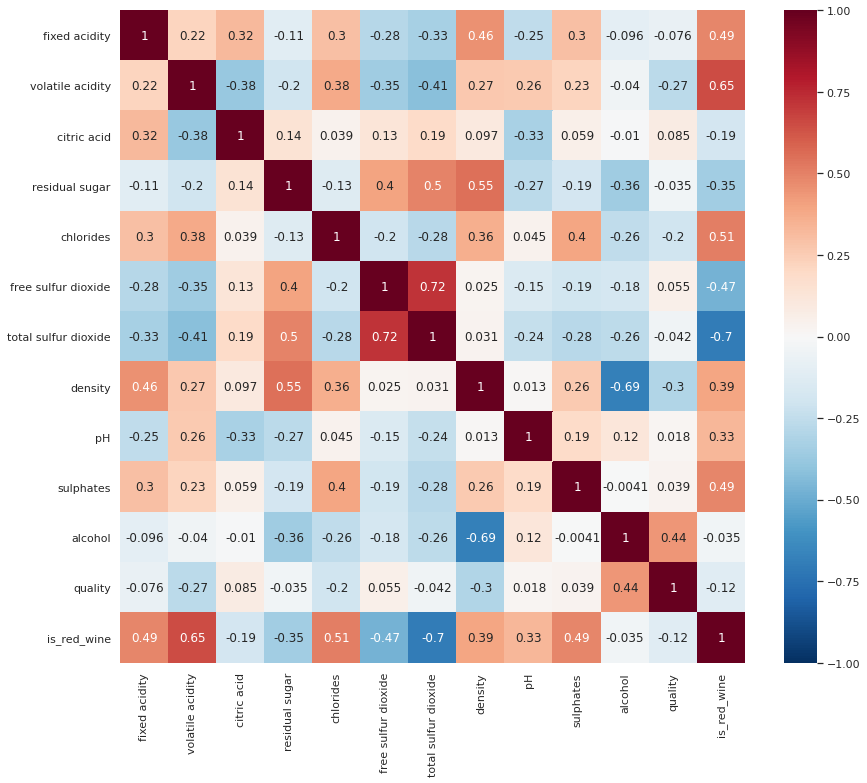

In [4]:
correlation = dataset.corr()
#display(correlation)
plt.figure(figsize=(14, 12))
heatmap = sns.heatmap(correlation, annot=True, linewidths=0, vmin=-1, cmap="RdBu_r")

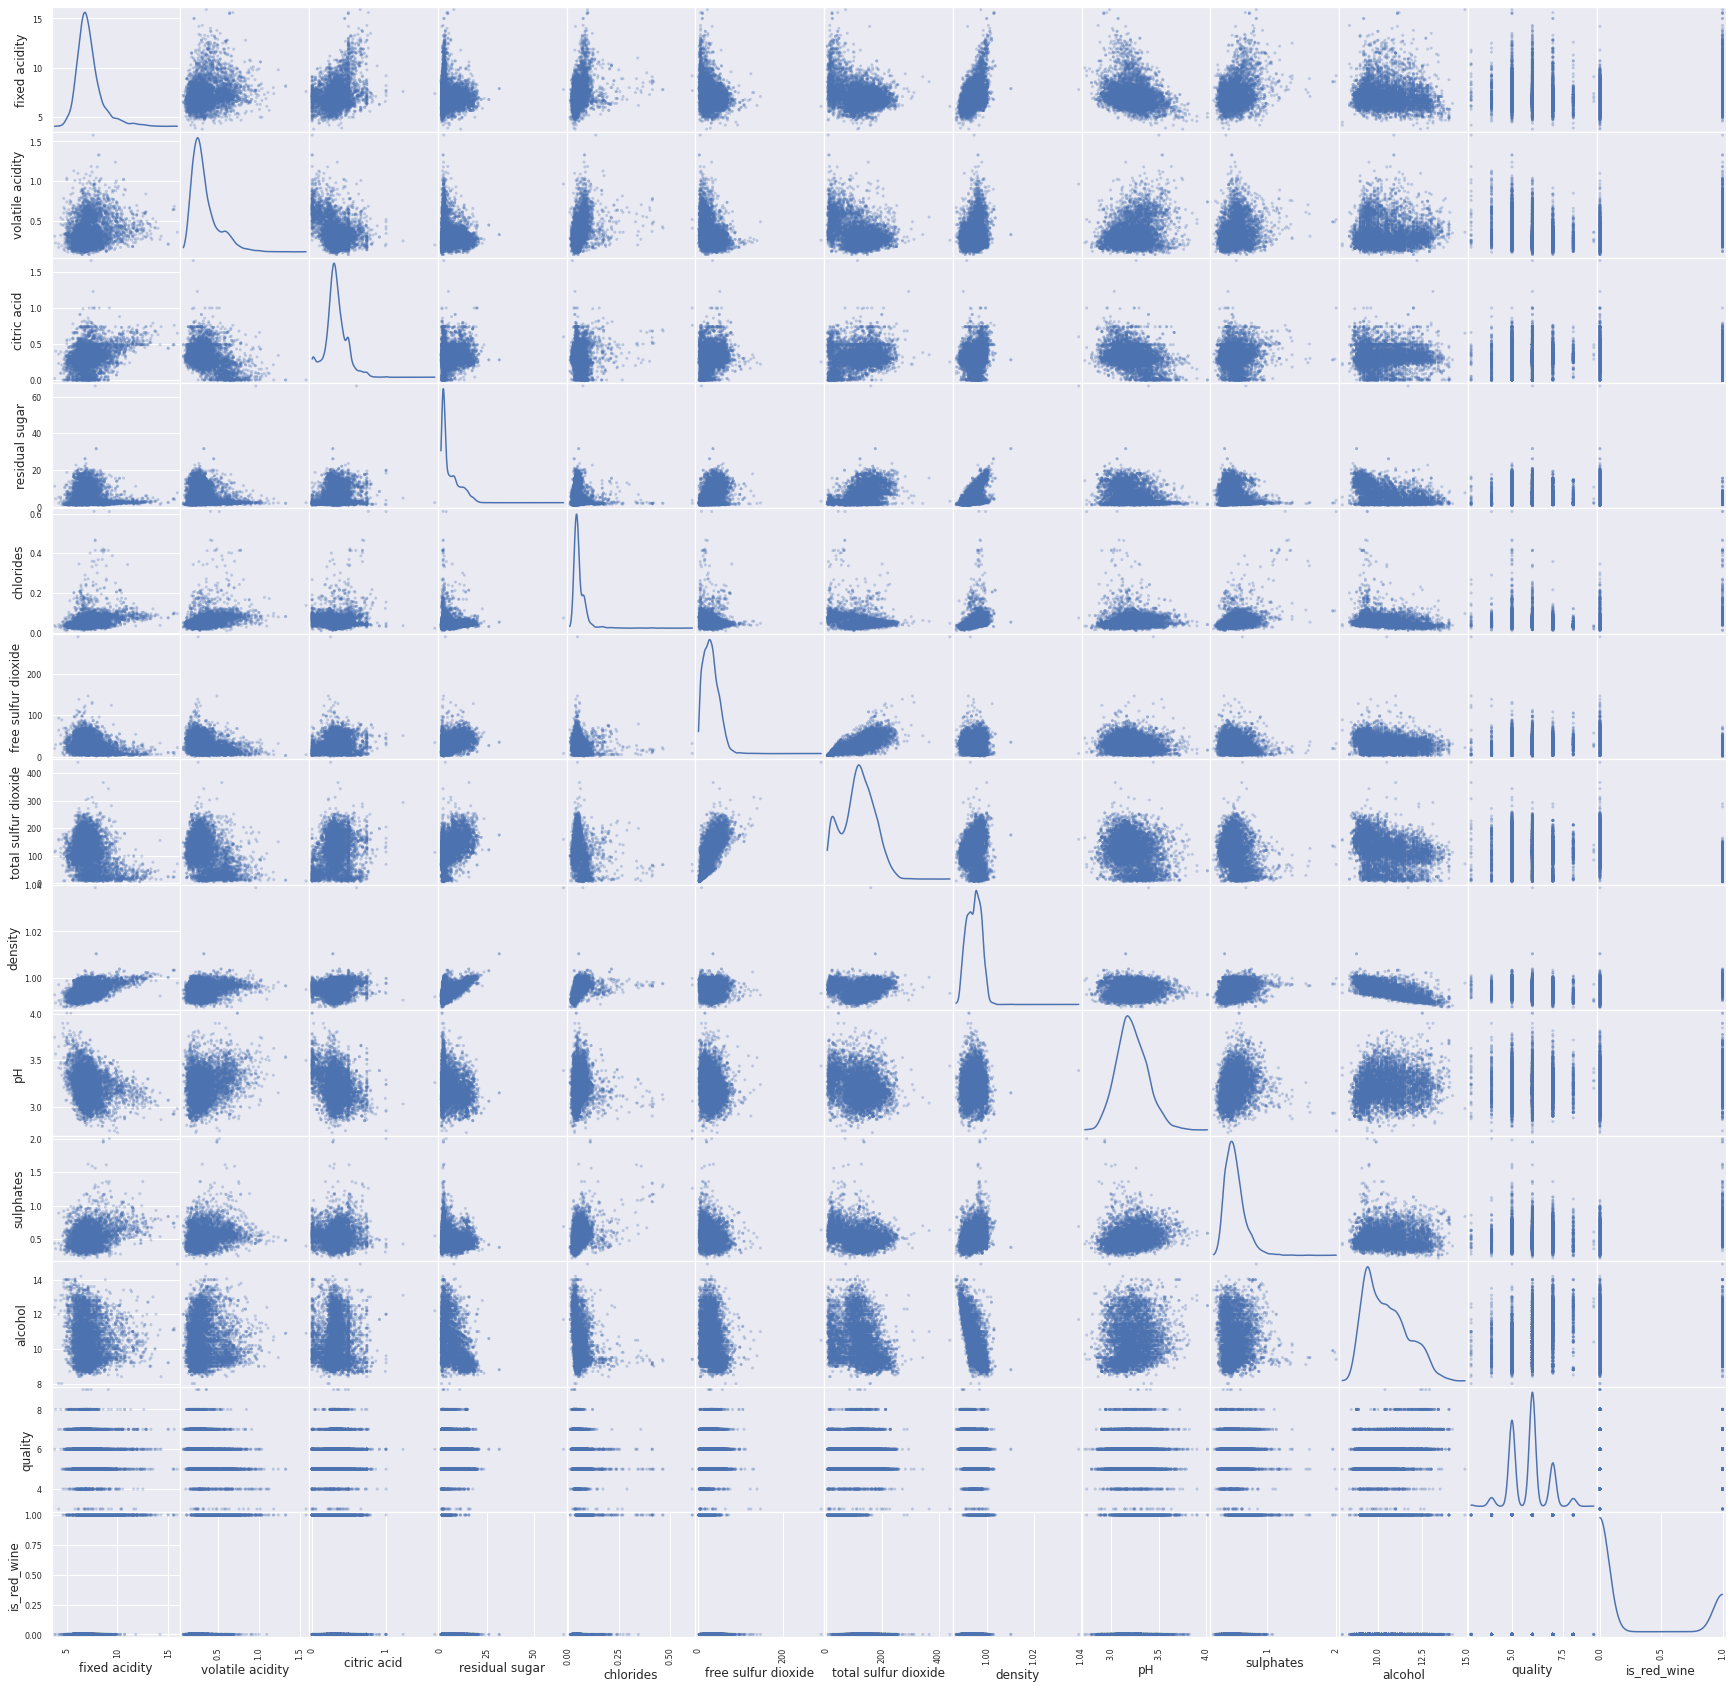

In [5]:
pd.plotting.scatter_matrix(dataset, alpha = 0.3, figsize = (30,30), diagonal = 'kde');

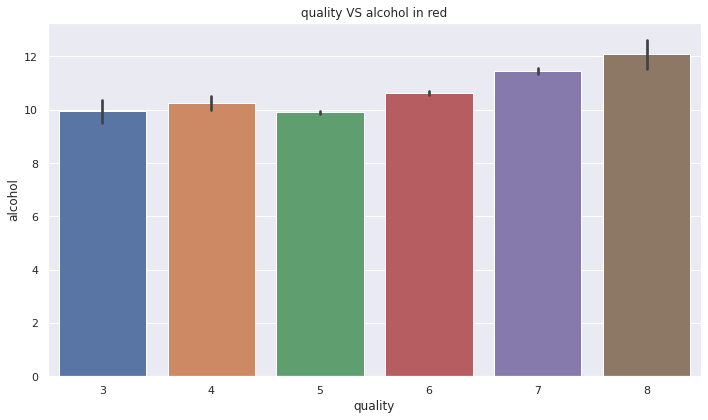

<Figure size 432x288 with 0 Axes>

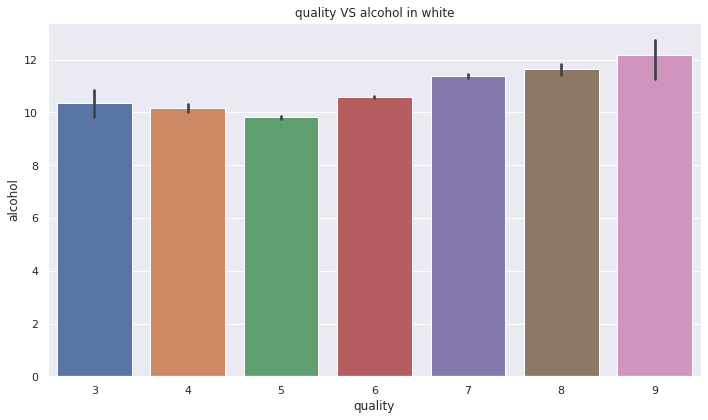

<Figure size 432x288 with 0 Axes>

In [6]:
#We can visualize relationships of discreet values better with a bar plot

fig, axs = plt.subplots(ncols=1,figsize=(10,6))
sns.barplot(x='quality', y='alcohol', data=dataset[dataset.type=="red"], ax=axs)
plt.title('quality VS alcohol in red')

plt.tight_layout()
plt.show()
plt.gcf().clear()

fig, axs = plt.subplots(ncols=1,figsize=(10,6))
sns.barplot(x='quality', y='alcohol', data=dataset[dataset.type=="white"], ax=axs)
plt.title('quality VS alcohol in white')

plt.tight_layout()
plt.show()
plt.gcf().clear()


Abans de començar amb els exercicis, preparaem les dades per a que sigui una classificació binaria

In [7]:
#Defining the splits for categories. 1-5 will be poor quality, 6-10 will be great
bins = [1,5,10]

#0 for low quality, 1 for great quality
quality_labels=[0,1]
dataset['quality_categorical'] = pd.cut(dataset['quality'], bins=bins, labels=quality_labels, include_lowest=True)
# Split the data into features and target label
quality_raw = dataset['quality_categorical']
features_raw = dataset.drop(['type', 'quality', 'quality_categorical'], axis = 1)


In [8]:
# Import train_test_split
from sklearn.model_selection import train_test_split

# Split the 'features' and 'income' data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(features_raw, 
                                                    quality_raw, 
                                                    test_size = 0.2, 
                                                    random_state = 0)

# Show the results of the split
print("Training set has {} samples. {:.1f}% is positive".format(X_train.shape[0], 100*sum(y_train)/y_train.shape[0]))
print("Testing set has {} samples. {:.1f}% is positive".format(X_test.shape[0], 100*sum(y_test)/y_test.shape[0]))

display(X_test)

Training set has 5170 samples. 63.1% is positive
Testing set has 1293 samples. 64.3% is positive


,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,is_red_wine
3859,7.300,0.250,0.260,7.200,0.048,52.000,207.000,0.996,3.120,0.370,9.200,0
4675,5.700,0.210,0.370,4.500,0.040,58.000,140.000,0.993,3.290,0.620,10.600,0
513,7.400,0.360,0.330,1.400,0.025,27.000,55.000,0.992,3.210,0.330,11.200,0
5490,9.000,0.450,0.490,2.600,0.084,21.000,75.000,0.999,3.350,0.570,9.700,1
4329,6.400,0.230,0.260,8.100,0.054,47.000,181.000,0.995,3.120,0.490,9.400,0
...,...,...,...,...,...,...,...,...,...,...,...,...
410,7.200,0.250,0.390,18.950,0.038,42.000,155.000,1.000,2.970,0.470,9.000,0
4562,5.600,0.180,0.300,10.200,0.028,28.000,131.000,0.995,3.490,0.420,10.800,0
5626,6.400,0.570,0.020,1.800,0.067,4.000,11.000,0.997,3.460,0.680,9.500,1
1248,7.200,0.180,0.310,1.100,0.045,20.000,73.000,0.993,3.320,0.400,10.800,0


## A. Ús LogisticRegression (20%)

En aquesta secció us demanem que apliqueu de sklearn el model de [LogisticRegression](https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LogisticRegression.html):

Si feu proves amb diferents parametres, guardeu els resultats que obtingueu en una taula de pandas i els mostreu.

* Guarda resultats de temps, de precisió, de accuracy, tant de train com de test


In [9]:
import sklearn
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score


def entrena_prediu_evalua(model, sample_size, X_train, y_train, X_test, y_test): 
    '''
    inputs:
       - model: el objecte que s'entrenarà
       - sample_size: el número de mostres del training set que es farán servir (en %)
       - X_train: caracteristiques entrenament
       - y_train: etiqueta entrenament
       - X_test: caracteristiques test
       - y_test: etiqueta test
    '''
    
    results = {"sample_size":sample_size}

    """
    Entrenar el model tenint en compte el 'sample_size' 
    """
    model.fit(X_train[:int(X_train.shape[0]*sample_size)], y_train[:int(X_train.shape[0]*sample_size)])
    
    """
    Obtenir les prediccions del model sobre el conjunt d'entrenament i sobre el conjunt de test
    """
    results['train_predictions'] = model.predict(X_train)
    results['test_predictions'] = model.predict(X_test)
    
    """
    Calcular el accuracy i el F1-score del train i del test
    """
    results["train_accuracy"] = model.score(X_train, y_train)
    results["test_accuracy"] = model.score(X_test, y_test)
    results["train_F1_score"] = sklearn.metrics.f1_score(y_train, results['train_predictions'])
    results["test_F1_score"] = sklearn.metrics.f1_score(y_test, results['test_predictions'])
    
    return results


A continuació farem un experiment per tal d'esbrinar com es comporta el model de regressió logística lineal en funció de la regularització, el solver i els paràmetres triats.

In [10]:
columns = ["solver", "penalty", "C", "l1_ratio", "sample_size",
           "train_accuracy", "test_accuracy", "train_F1_score", "test_F1_score"]

resultats = pd.DataFrame(columns=columns)

experiment = {key:None for key in columns}

for penalty in ["none", "l1", "l2", "elasticnet"]:
    if penalty == "none":
        solver_list = ['newton-cg', 'lbfgs', 'sag', 'saga']
        C_list = [None]
        l1_ratio_list = [None]
    elif penalty == "l1":
        solver_list = ['liblinear', 'saga']
        C_list = [1e-4, 1e-3, 1e-2, 1e-1, 1e1, 1e2, 1e3, 1e4]
        l1_ratio_list = [None]
    elif penalty == 'l2':
        solver_list = ['liblinear', 'newton-cg', 'lbfgs', 'sag', 'saga']
        C_list = [1e-4, 1e-3, 1e-2, 1e-1, 1e1, 1e2, 1e3, 1e4]
        l1_ratio_list = [None]
    else:
        solver_list = ['saga']
        C_list = [1e-4, 1e-3, 1e-2, 1e-1, 1e1, 1e2, 1e3, 1e4]
        l1_ratio_list = np.linspace(0, 1, 10)
    
    for solver in solver_list:
        for C in C_list:
            for l1_ratio in l1_ratio_list:
                for sample_size in [0.4, 0.6, 0.8, 1]:
                    
                    experiment["penalty"] = penalty
                    experiment["solver"] = solver
                    experiment["C"] = C
                    experiment["l1_ratio"] = l1_ratio
                    experiment["sample_size"] = sample_size
                    
                    if C is not None:
                        model = linear_model.LogisticRegression(max_iter=1000, C=C, penalty=penalty,
                                                                solver=solver, l1_ratio=l1_ratio)
                    else:
                        model = linear_model.LogisticRegression(max_iter=1000, penalty=penalty,
                                                                solver=solver, l1_ratio=l1_ratio)
                    
                    resultat = entrena_prediu_evalua(model, sample_size, X_train, y_train, X_test, y_test)
                    
                    for key in ["train_accuracy", "test_accuracy", "train_F1_score", "test_F1_score"]:
                        experiment[key] = resultat[key]
                    
                    resultats = resultats.append(experiment, ignore_index=True)

/home/albert/miniconda3/lib/python3.8/site-packages/scipy/optimize/linesearch.py:477: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
/home/albert/miniconda3/lib/python3.8/site-packages/scipy/optimize/linesearch.py:327: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
/home/albert/miniconda3/lib/python3.8/site-packages/scipy/optimize/linesearch.py:477: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
/home/albert/miniconda3/lib/python3.8/site-packages/scipy/optimize/linesearch.py:327: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
/home/albert/miniconda3/lib/python3.8/site-packages/scipy/optimize/linesearch.py:477: LineSearchWarning: The line search

/home/albert/miniconda3/lib/python3.8/site-packages/scipy/optimize/linesearch.py:477: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
/home/albert/miniconda3/lib/python3.8/site-packages/scipy/optimize/linesearch.py:327: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
/home/albert/miniconda3/lib/python3.8/site-packages/scipy/optimize/linesearch.py:477: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
/home/albert/miniconda3/lib/python3.8/site-packages/scipy/optimize/linesearch.py:327: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
/home/albert/miniconda3/lib/python3.8/site-packages/scipy/optimize/linesearch.py:477: LineSearchWarning: The line search

/home/albert/miniconda3/lib/python3.8/site-packages/sklearn/linear_model/_sag.py:329: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "
/home/albert/miniconda3/lib/python3.8/site-packages/sklearn/linear_model/_sag.py:329: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "
/home/albert/miniconda3/lib/python3.8/site-packages/sklearn/linear_model/_sag.py:329: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "
/home/albert/miniconda3/lib/python3.8/site-packages/sklearn/linear_model/_sag.py:329: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "
/home/albert/miniconda3/lib/python3.8/site-packages/sklearn/linear_model/_sag.py:329: Convergenc

/home/albert/miniconda3/lib/python3.8/site-packages/sklearn/linear_model/_sag.py:329: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "
/home/albert/miniconda3/lib/python3.8/site-packages/sklearn/linear_model/_sag.py:329: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "
/home/albert/miniconda3/lib/python3.8/site-packages/sklearn/linear_model/_sag.py:329: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "
/home/albert/miniconda3/lib/python3.8/site-packages/sklearn/linear_model/_sag.py:329: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "
/home/albert/miniconda3/lib/python3.8/site-packages/sklearn/linear_model/_sag.py:329: Convergenc

/home/albert/miniconda3/lib/python3.8/site-packages/sklearn/linear_model/_sag.py:329: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "
/home/albert/miniconda3/lib/python3.8/site-packages/sklearn/linear_model/_sag.py:329: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "
/home/albert/miniconda3/lib/python3.8/site-packages/sklearn/linear_model/_sag.py:329: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "
/home/albert/miniconda3/lib/python3.8/site-packages/sklearn/linear_model/_sag.py:329: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "
/home/albert/miniconda3/lib/python3.8/site-packages/sklearn/linear_model/_sag.py:329: Convergenc

/home/albert/miniconda3/lib/python3.8/site-packages/sklearn/linear_model/_sag.py:329: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "
/home/albert/miniconda3/lib/python3.8/site-packages/sklearn/linear_model/_sag.py:329: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "
/home/albert/miniconda3/lib/python3.8/site-packages/sklearn/linear_model/_sag.py:329: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "
/home/albert/miniconda3/lib/python3.8/site-packages/sklearn/linear_model/_sag.py:329: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "
/home/albert/miniconda3/lib/python3.8/site-packages/sklearn/linear_model/_sag.py:329: Convergenc

/home/albert/miniconda3/lib/python3.8/site-packages/sklearn/linear_model/_sag.py:329: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "
/home/albert/miniconda3/lib/python3.8/site-packages/sklearn/linear_model/_sag.py:329: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "
/home/albert/miniconda3/lib/python3.8/site-packages/sklearn/linear_model/_sag.py:329: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "
/home/albert/miniconda3/lib/python3.8/site-packages/sklearn/linear_model/_sag.py:329: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "
/home/albert/miniconda3/lib/python3.8/site-packages/sklearn/linear_model/_sag.py:329: Convergenc

/home/albert/miniconda3/lib/python3.8/site-packages/sklearn/linear_model/_sag.py:329: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "
/home/albert/miniconda3/lib/python3.8/site-packages/sklearn/linear_model/_sag.py:329: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "
/home/albert/miniconda3/lib/python3.8/site-packages/sklearn/linear_model/_sag.py:329: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "
/home/albert/miniconda3/lib/python3.8/site-packages/sklearn/linear_model/_sag.py:329: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "
/home/albert/miniconda3/lib/python3.8/site-packages/sklearn/linear_model/_sag.py:329: Convergenc

/home/albert/miniconda3/lib/python3.8/site-packages/sklearn/linear_model/_sag.py:329: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "
/home/albert/miniconda3/lib/python3.8/site-packages/sklearn/linear_model/_sag.py:329: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "
/home/albert/miniconda3/lib/python3.8/site-packages/sklearn/linear_model/_sag.py:329: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "
/home/albert/miniconda3/lib/python3.8/site-packages/sklearn/linear_model/_sag.py:329: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "
/home/albert/miniconda3/lib/python3.8/site-packages/sklearn/linear_model/_sag.py:329: Convergenc

/home/albert/miniconda3/lib/python3.8/site-packages/sklearn/linear_model/_sag.py:329: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "
/home/albert/miniconda3/lib/python3.8/site-packages/sklearn/linear_model/_sag.py:329: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "
/home/albert/miniconda3/lib/python3.8/site-packages/sklearn/linear_model/_sag.py:329: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "
/home/albert/miniconda3/lib/python3.8/site-packages/sklearn/linear_model/_sag.py:329: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "
/home/albert/miniconda3/lib/python3.8/site-packages/sklearn/linear_model/_sag.py:329: Convergenc

Anem a analitzar els resultats dels experiments.

Com veiem a continuació, els millors resultats sobre el conjunt de test s'han obtingut amb el solver "liblinear" i amb regularització $l^1$ amb coeficient de $\frac{1}{C}=10^{-3}$. Es de destacar que s'han aconseguit usant tot el conjunt de training (sample_size=1). Això demostra que el "sample sizing" no és una bona tècnica de regularització, sempre podràs aconseguir iguals o millors resultats amb altres tècniques (i sense desperdiciar dades).

Un fet enormement sorprenent es que els millors resultats sobre el conjunt de training s'han obtingut usant nomès el 80% del conjunt (sample_size=0.8). Es realment sorprenent!! En aquest cas, el model s'ajusta millor a les dades sense haverles vist totes. L'única explicació raonable que trobo és que en el 20% del training dataset que no s'ha utilitzat estiguessin tots els outliers (això demostraría la importància de realitzar un preanàlisi sobre les dades per a eliminar els outliers).

In [11]:
display(resultats)
print("\n\nL'experiment amb el train_accuracy mes gran és\n", resultats.iloc[resultats["train_accuracy"].argmax()])
print("\n\nL'experiment amb el test_Accuracy mes gran és\n", resultats.iloc[resultats["test_accuracy"].argmax()])
print("\n\nL'experiment amb el train_F1_score mes gran és\n", resultats.iloc[resultats["train_F1_score"].argmax()])
print("\n\nL'experiment amb el test_F1_score mes gran és\n", resultats.iloc[resultats["test_F1_score"].argmax()])

,solver,penalty,C,l1_ratio,sample_size,train_accuracy,test_accuracy,train_F1_score,test_F1_score
0,newton-cg,none,nan,None,0.400,0.744,0.742,0.802,0.805
1,newton-cg,none,nan,None,0.600,0.742,0.737,0.805,0.804
2,newton-cg,none,nan,None,0.800,0.743,0.735,0.806,0.802
3,newton-cg,none,nan,None,1.000,0.744,0.739,0.806,0.804
4,lbfgs,none,nan,None,0.400,0.742,0.740,0.801,0.803
...,...,...,...,...,...,...,...,...,...
555,saga,elasticnet,10000.000,0.889,1.000,0.694,0.691,0.778,0.778
556,saga,elasticnet,10000.000,1.000,0.400,0.674,0.668,0.764,0.764
557,saga,elasticnet,10000.000,1.000,0.600,0.677,0.671,0.771,0.769
558,saga,elasticnet,10000.000,1.000,0.800,0.682,0.684,0.772,0.776




L'experiment amb el train_accuracy mes gran és
 solver              lbfgs
penalty                l2
C                1000.000
l1_ratio             None
sample_size         0.800
train_accuracy      0.747
test_accuracy       0.741
train_F1_score      0.809
test_F1_score       0.806
Name: 170, dtype: object


L'experiment amb el test_Accuracy mes gran és
 solver            liblinear
penalty                  l1
C                  1000.000
l1_ratio               None
sample_size           1.000
train_accuracy        0.745
test_accuracy         0.745
train_F1_score        0.807
test_F1_score         0.808
Name: 43, dtype: object


L'experiment amb el train_F1_score mes gran és
 solver              lbfgs
penalty                l2
C                1000.000
l1_ratio             None
sample_size         0.800
train_accuracy      0.747
test_accuracy       0.741
train_F1_score      0.809
test_F1_score       0.806
Name: 170, dtype: object


L'experiment amb el test_F1_score mes gran és
 solver  

## B. Regularitzadors (40%)

### * Descriu el parametre **penalty** de LogisticRegression {‘l1’, ‘l2’, ‘elasticnet’, ‘none’}

Aquest parametre permet escollir si s'utilitzará o no regularitzador, i en cas afirmatiu quin regularitzador s'usarà. En concret, la opció 'none' indica que no s'usarà regularitzador, la opció 'l1' indica que s'usarà el regularitzador l1 (suma dels valors absoluts dels paràmetres del model), la opció 'l2' indica que s'usarà el regularitzador l2 (suma dels quadrats dels paràmetres del model) i la opció 'elasticnet' indica que s'utilitzarà una mescla (o fusió) dels regularitzadors l1 i l2 (en concret, $\alpha*l1\_ratio*||w||_1+\alpha*(1-l1\_ratio)*||w||^2_2$).

### * Hi ha alguna regularitzador que no està implementat en segons quin **solver**. Haureu de trobar la combinació que funciona.

En efecte, 
1. Sense regularitzador es poden usar els solvers ‘newton-cg’, ‘lbfgs’, ‘sag’ i ‘saga’.
2. Amb el regularitzador $l^1$ es poden usar els solvers ‘liblinear’ i ‘saga’ ,
3. Amb el regularitzador $l^2$ es poden usar els solvers ‘liblinear’, ‘newton-cg’, ‘lbfgs’, ‘sag’ i ‘saga’.
4. Amb el regularitzador "elasticnet" nomès es pot usar el solver ‘saga’.

### * Què representen els atributs *coef_* i *intercept_*. Mostra'ls. Hi veus alguna diferencia depenen del regularitzador utilitzat?

Els models de regressió logística (almenys els vists a classe) son de la forma $h_\theta(x)=g(f_\theta(x))$, on $g(z)$ és la funció sigmoide o logística i $f_\theta(x)$ és un model de regressió. 

En el nostre cas, al estar usant la classe sklearn.linear_model.LogisticRegression, el model de regressió $f_\theta$ és lineal, i els atributs *coef_* i *intercept_* no son mes que els coeficients del model (paràmetres que multipliquen cadascún a un feature) i el seu intercept (valor que pren la recta al tallar l'origen de coordenades).

Per a mostrar les diferencies farem alguns experiments i generarem una taula petiteta a continuació. Farem tots els experiments amb el solver 'saga' (que és l'únic que podem usar amb tots els regularitzadors i sense regularitzador) i tots els altres paràmetres fixats excepte el regularitzador i C.

In [12]:
columnes = ["regularizer", "intercept_", "coef_"]
dades = pd.DataFrame(columns = columnes)
resultat = {key:None for key in columnes}

solver = 'saga'
sample_size = 1
l1_ratio = None

for penalty in ["none", "l1", "l2", "elasticnet"]:
    if penalty == "none":
        C_list = [None]
    else:
        C_list = [1e-4, 1e-3, 1e-2, 1e-1, 1e1, 1e2, 1e3, 1e4]
    if penalty == "elasticnet":
        l1_ratio = 0.5
    
    for C in C_list:
        if C is not None:
            model = linear_model.LogisticRegression(max_iter=1000, C=C, penalty=penalty,
                                                    solver=solver, l1_ratio=l1_ratio)
        else:
            model = linear_model.LogisticRegression(max_iter=1000, penalty=penalty,
                                                    solver=solver, l1_ratio=l1_ratio)
                    
        entrena_prediu_evalua(model, sample_size, X_train, y_train, X_test, y_test)
        
        resultat["regularizer"] = penalty
        resultat["intercept_"] = model.intercept_
        resultat["coef_"] = model.coef_
        
        dades = dades.append(resultat, ignore_index=True)

/home/albert/miniconda3/lib/python3.8/site-packages/sklearn/linear_model/_sag.py:329: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "
/home/albert/miniconda3/lib/python3.8/site-packages/sklearn/linear_model/_sag.py:329: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "
/home/albert/miniconda3/lib/python3.8/site-packages/sklearn/linear_model/_sag.py:329: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "
/home/albert/miniconda3/lib/python3.8/site-packages/sklearn/linear_model/_sag.py:329: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "
/home/albert/miniconda3/lib/python3.8/site-packages/sklearn/linear_model/_sag.py:329: Convergenc

In [13]:
atributs = ["atribut_"+str(i) for i in range(dataset.shape[1]-3)]

coefs = dades['coef_'].to_list()
for i in range(len(coefs)):
    coefs[i] = coefs[i].reshape(-1)

intercepts = pd.DataFrame(dades['intercept_'].to_list(), columns=['intercept'])
atributs = pd.DataFrame(coefs, columns=atributs)

newdata = pd.concat([dades['regularizer'],intercepts, atributs], axis=1, sort=False)

print("A continuació mostrem la mitjana dels atributs per a cada regularitzador")
print(newdata.groupby('regularizer').mean())
print("A continuació mostrem la desviació estàndard dels atributs per a cada regularitzador.")
print("\n\n\n", newdata.groupby('regularizer').std()) 

A continuació mostrem la mitjana dels atributs per a cada regularitzador
             intercept  atribut_0  atribut_1  atribut_2  atribut_3  atribut_4  \
regularizer                                                                     
elasticnet      -0.172     -0.141     -0.449      0.106      0.024     -0.041   
l1              -0.145     -0.142     -0.418      0.103      0.023     -0.037   
l2              -0.207     -0.165     -0.485      0.130      0.027     -0.054   
none            -0.253     -0.186     -0.660      0.177      0.034     -0.073   

             atribut_5  atribut_6  atribut_7  atribut_8  atribut_9  \
regularizer                                                          
elasticnet       0.018     -0.009     -0.155     -0.586      0.047   
l1               0.017     -0.009     -0.151     -0.567      0.044   
l2               0.020     -0.010     -0.186     -0.615      0.057   
none             0.021     -0.011     -0.255     -0.840      0.082   

             atribu

Observem que, en general, els atributs dels models entrenats amb el regularitzador tenen mitja més alta però variància més petita que els entrenats amb regularitzador l1. Això s'explica perquè l'ús del regularitzador l2 afavoreix que els atributs (paràmetres del model) prenguin valors no nuls petits (ja que el quadrat fa mes petits valors per sota de valor absolut 1, i fa molt grans valors per sobre), mentre que el regularitzador l1 afavoreix que hi hagin pocs atributs no nuls (no penalitza atributs una mica grans, sempre i quant siguin pocs).

Observem que la presència de molts atributs (casi)nuls i alguns amb valor (relativament)alt fa disminuir la mitja i creixer la variància (cas del regularitzador l1), mentre que la distribucióde paràmetres en l'intèrval $[-1,1]$ que afavoreix el regularitzador l2 fa disminuir la variància.


Pel que fa als paràmetres dels models entrenats amb regularització elasticnet, com era d'esperar per ser aquesta una mescla de l1 i l2, els resultats tendeixen a estar a mig camí dels obtinguts amb les dues regularitzacions.

Finalment, com era d'esperar, els valors absoluts més grans per als atributs els trobem quan no usem regularització.

### * Què fa el parametre *C*. En quins casos afecta? Fes una taula mostrant els resultats.

El paràmetre *C* determina la potència de l'efecte que té el regularitzador sobre l'entrenament. En concret, quan usem un regularitzador $R(\theta)$, a la funció de pèrdua $J(\theta)$ se li suma $\frac{1}{C}R(\theta)$. És a dir, quant més alt el valor de *C* menys efecte tindrá el regularitzador (menys generarà biaix i reduirà la variància) i quant més baix el seu valor més efecte tindrà el regularitzador (mes generarà biaix i reduirà la variància).

Obviament, l'ús del paràmetre *C* en la funció LogisticRegression de sklearn afecta sempre que s'usa un regularitzador (és a dir, sempre excepte quan penalty='none').

Ja he fet una taula abans (més completa impossible, però també enorme i difícil de llegir). Per tant, en aquest apartat faré una taula molt simple consistent en variar el paràmetre *C* deixant els altres paràmetres fixos (i agafant els que abans ens han donat el millor resultat). La taula es mostra a continuació:

In [14]:
outputs = ["train_accuracy", "test_accuracy", "train_F1_score", "test_F1_score"]
taula = pd.DataFrame(columns=["C"]+outputs)
resultat = {key:None for key in outputs}
resultat["C"] = None

params = dict(resultats.iloc[resultats["test_accuracy"].argmax()].drop(
    ["C", "train_accuracy", "test_accuracy", "train_F1_score", "test_F1_score"]))

sample_size = params["sample_size"]
del params["sample_size"]

for C in [1e-4, 1e-3, 1e-2, 1e-1, 1e1, 1e2, 1e3, 1e4, 1e5, 1e6, 1e7]:
    model = linear_model.LogisticRegression(max_iter=1000, C=C, **params)
    out = entrena_prediu_evalua(model, sample_size, X_train, y_train, X_test, y_test)
    
    resultat["C"] = C
    for key in outputs:
        resultat[key] = out[key]
    
    taula = taula.append(resultat, ignore_index=True)

print(taula)

              C  train_accuracy  test_accuracy  train_F1_score  test_F1_score
0         0.000           0.631          0.643           0.773          0.782
1         0.001           0.635          0.644           0.775          0.782
2         0.010           0.676          0.662           0.775          0.768
3         0.100           0.736          0.732           0.803          0.802
4        10.000           0.745          0.744           0.807          0.808
5       100.000           0.745          0.744           0.807          0.808
6      1000.000           0.745          0.744           0.807          0.808
7     10000.000           0.745          0.745           0.807          0.808
8    100000.000           0.745          0.745           0.807          0.808
9   1000000.000           0.745          0.744           0.807          0.808
10 10000000.000           0.745          0.745           0.807          0.808


Observem que tant la accuracy com el F1-score de train i test creixen amb *C*, i s'estaquen a partir de $C=10$. Això pasa perque, per a valors baixos de $C$ el biaix creix massa i impedeix que el model lineal modelitzi bé la distribució de dades. 

A més, el fet que la accuracy i el F1-score s'estanquin quan fem $C$ gran (quan reduim l'efecte de la regularització) ens diu que el model és massa simple com per realitzar overfitting i no requereix regularització. En essència, aquest resultat ens dona pistes de que potser amb un model més complex (i, probablement, regularització) obtindríem millors resultats.

## C. Demostració Error de Bias (20%)

#### * Què hem de fer per veure que el model que estem provant té un error de bias molt alt? (es a dir, model simple)

En essència, hem d'entrenar diverses copies del model sobre conjunts de dades diferents i analitzar les diferencies entre els models entrenats. Si els models difereixen molt poc vol dir que el model és massa simple (té un biaix alt).

Una manera senzilla de comprovar-ho pot ser entrenar els diversos models seguint la técnica de cross-validation i analitzar la variància de cadascún dels seus paràmetres. Fixat un threshold, si la mitjana de les variàncies es menor que aquest threshold decidim que el model té un error de biaix no assumible i procedim a crear un model més complex.

#### * Què passa si fem servir poques dades per entrenar? (mostra com varien els resultats segons % de entrenament)

Farem l'experiment amb la combinació de paràmetres, regularization i solver amb la qual hem obtingut el millor resultat amb l'experiment inicial.

Observem que la diferència d'accuracy és mínima (tant sobre el conjunt de training com sobre el de test) entre usar totes les dades de training per a l'entrenament i entre usar tan sols un $2.5\%$ de les dades (wow!). Això es una gran pista de que les dades son molt simples, doncs amb una quantitat molt petita de dades d'entrenament s'obté un model que generalitza de forma prou decent sobre la resta de dades.

Això si, les accuracy obtingudes (tot i decents), no son ni molt menys per a tirar cohets, cosa que ens ha de portar a provar models mes complexos.

,sample_size,train_accuracy,test_accuracy,train_F1_score,test_F1_score
0,0.025,0.724,0.718,0.785,0.782
1,0.050,0.733,0.737,0.789,0.796
2,0.075,0.726,0.715,0.779,0.773
3,0.100,0.733,0.722,0.790,0.784
4,0.125,0.733,0.729,0.792,0.791
...,...,...,...,...,...
35,0.900,0.745,0.743,0.807,0.807
36,0.925,0.744,0.745,0.806,0.808
37,0.950,0.744,0.742,0.806,0.807
38,0.975,0.744,0.742,0.806,0.806


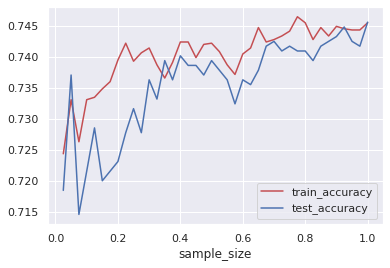

In [15]:
params = dict(resultats.iloc[resultats["test_accuracy"].argmax()].drop(
    ["sample_size", "train_accuracy", "test_accuracy", "train_F1_score", "test_F1_score"]))

outputs = ["train_accuracy", "test_accuracy", "train_F1_score", "test_F1_score"]
resultat = {}
df = pd.DataFrame(columns=["sample_size"]+outputs)

for sample_size in np.linspace(0.025, 1, 40):
    model = linear_model.LogisticRegression(max_iter=1000, **params)
    out = entrena_prediu_evalua(model, sample_size, X_train, y_train, X_test, y_test)
    
    resultat["sample_size"] = sample_size
    for key in outputs:
        resultat[key] = out[key]
    
    df = df.append(resultat, ignore_index=True)

display(df)

plot1, = plt.plot(np.linspace(0.025, 1, 40), df["train_accuracy"], 'r', label="train_accuracy")
plot2, = plt.plot(np.linspace(0.025, 1, 40), df["test_accuracy"], 'b', label="test_accuracy")
plt.xlabel('sample_size')
plt.legend(handles=[plot1, plot2])
plt.show()

#### * I si utilitzem poques iteracions limitant el *max_iter*

Igual que abans, farem l'experiment  amb la combinació de paràmetres, regularization i solver amb la qual hem obtingut el millor resultat amb l'experiment inicial.

Observem que amb poquísimes iteracions (unes 30) el model ja arriba al seu óptim. Això ens indica que el model és súper simple. Això si, cal aclarir que simple no equival a dolent (potser les dades a modelar també son molt simples).

/home/albert/miniconda3/lib/python3.8/site-packages/sklearn/svm/_base.py:976: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn("Liblinear failed to converge, increase "
/home/albert/miniconda3/lib/python3.8/site-packages/sklearn/svm/_base.py:976: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn("Liblinear failed to converge, increase "
/home/albert/miniconda3/lib/python3.8/site-packages/sklearn/svm/_base.py:976: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn("Liblinear failed to converge, increase "
/home/albert/miniconda3/lib/python3.8/site-packages/sklearn/svm/_base.py:976: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn("Liblinear failed to converge, increase "
/home/albert/miniconda3/lib/python3.8/site-packages/sklearn/svm/_base.py:976: ConvergenceWarning: Liblinear failed t

,max_iter,train_accuracy,test_accuracy,train_F1_score,test_F1_score
0,1.000,0.658,0.650,0.766,0.761
1,4.000,0.700,0.695,0.792,0.790
2,7.000,0.702,0.699,0.793,0.792
3,10.000,0.718,0.709,0.798,0.792
4,13.000,0.739,0.736,0.807,0.807
...,...,...,...,...,...
105,316.000,0.745,0.746,0.807,0.809
106,319.000,0.745,0.744,0.807,0.808
107,322.000,0.745,0.745,0.807,0.808
108,325.000,0.745,0.745,0.807,0.808


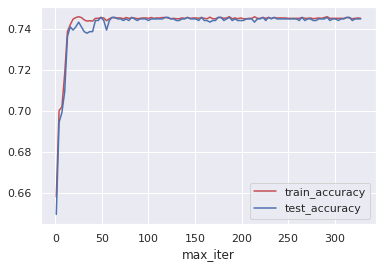

In [16]:
params = dict(resultats.iloc[resultats["test_accuracy"].argmax()].drop(
    ["sample_size", "train_accuracy", "test_accuracy", "train_F1_score", "test_F1_score"]))

outputs = ["train_accuracy", "test_accuracy", "train_F1_score", "test_F1_score"]
resultat = {}
df = pd.DataFrame(columns=["max_iter"]+outputs)

for max_iter in range(1, 331, 3):
    model = linear_model.LogisticRegression(max_iter=max_iter, **params)
    out = entrena_prediu_evalua(model, 1, X_train, y_train, X_test, y_test)
    
    resultat["max_iter"] = max_iter
    for key in outputs:
        resultat[key] = out[key]
    
    df = df.append(resultat, ignore_index=True)

display(df)

plot1, = plt.plot(range(1, 331, 3), df["train_accuracy"], 'r', label="train_accuracy")
plot2, = plt.plot(range(1, 331, 3), df["test_accuracy"], 'b', label="test_accuracy")
plt.xlabel('max_iter')
plt.legend(handles=[plot1, plot2])
plt.show()

## D. Demostració Error de Variance (20%)

#### * Què hem de fer per veure que el model que estem provant té un error de variança molt alt? (es a dir, model massa complexe)

Igual que per a detectar l'error de bias, hem d'entrenar diverses copies del model sobre conjunts de dades diferents i analitzar les diferencies entre els models entrenats. Si els models difereixen molt vol dir que el model és massa complex.

Una manera senzilla de comprovar-ho pot ser entrenar els diversos models seguint la técnica de cross-validation i analitzar la variància de cadascún dels seus paràmetres. Fixat un threshold, si la mitjana de les variàncies supera aquest threshold decidim que el model té un error de variança no assumible i procedim a crear un model més simple.

#### * Crea models de features més complexes amb [sklearn.preprocessing.PolynomialFeatures](https://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.PolynomialFeatures.html)

Igual que venim fent fins ara, farem l'experiment  amb la combinació de paràmetres, regularization i solver amb la qual hem obtingut el millor resultat amb l'experiment inicial.

Observem que la accuracy tant sobre el conjunt de training com el de test apenes augmenta al augmentar el grau del polinomi en el que basem la regressió logística.

Tot i això, les accuracy obtingudes no son res de l'altre món, i per tant això ens ha de portar a pensar que potser el model polinomial no modelitza bé les dades (i per tant hauríem de buscar un altres tipus de model, per exemple una xarxa neuronal).  Una altra possibilitat és que, simplement, les dades de que disposem no continguin suficient informació.

,polynomial_degree,train_accuracy,test_accuracy,train_F1_score,test_F1_score
0,1.000,0.761,0.755,0.818,0.814
1,2.000,0.762,0.757,0.818,0.816
2,3.000,0.762,0.762,0.819,0.819
3,4.000,0.761,0.756,0.818,0.815
4,5.000,0.762,0.756,0.818,0.815
5,6.000,0.762,0.756,0.819,0.815
6,7.000,0.762,0.757,0.818,0.816
7,8.000,0.763,0.756,0.819,0.815
8,9.000,0.762,0.757,0.818,0.816


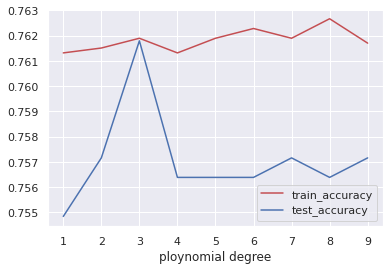

In [17]:
params = dict(resultats.iloc[resultats["test_accuracy"].argmax()].drop(
    ["sample_size", "train_accuracy", "test_accuracy", "train_F1_score", "test_F1_score"]))

outputs = ["train_accuracy", "test_accuracy", "train_F1_score", "test_F1_score"]
resultat = {}
df = pd.DataFrame(columns=["polynomial_degree"]+outputs)

for degree in range(1,10):
    poly = sklearn.preprocessing.PolynomialFeatures(degree=2, include_bias=False)
    model = linear_model.LogisticRegression(max_iter=1000, **params)
    out = entrena_prediu_evalua(model, 1, poly.fit_transform(X_train), y_train, poly.fit_transform(X_test), y_test)
    
    resultat["polynomial_degree"] = degree
    for key in outputs:
        resultat[key] = out[key]
    
    df = df.append(resultat, ignore_index=True)

display(df)

plot1, = plt.plot(range(1,10), df["train_accuracy"], 'r', label="train_accuracy")
plot2, = plt.plot(range(1,10), df["test_accuracy"], 'b', label="test_accuracy")
plt.xlabel('ploynomial degree')
plt.legend(handles=[plot1, plot2])
plt.show()

#### * Podem reduir el error de variança si enlloc de classificar el vi blanc i el negre, els separessim?

Entenc que estás proposant dividir el dataset en dos (vi blanc i vi negre) i entrenar dos models iguals, un sobre cada part del dataset. 

És possible que això semblès reduïr l'error de variància del model, ja que és de suposar que les dades de vi blanc seràn mes similars entre si (ídem per les de vi negre) i per tant no hi hauríen tants outliers que fessin oscil·lar el model.

Tot i que el que acabem de dir és possible, en realitat això sería una sol·lució artificial, ja que estaríem eliminant la **variancia de les dades** i no del model.

#### * Sabrieu explicar-me aquesta [gráfica](https://scikit-learn.org/stable/auto_examples/linear_model/plot_ridge_path.html)? Podeu generar-la amb aquestes dades de entrenament?

En aquesta gràfica veiem els valors que prenen els coeficients del model si, aplicant regularització l2, anem modificant el paràmetre de regularització $\alpha=\frac{1}{C}$ (cada coeficient té associat un color). 

Observem com per a valors de $\alpha$ alts (començant per $\alpha=10^{-3}$) el regularitzador té bastant pes dins la funció de pèrdua i per tant (com hem explicat abans) els valors dels paràmetres tendeixen a concentrarse dins l'intèrval $[-1, 1]$. Per contra, a mesura que el valor de $\alpha$ va disminuint, el pes del regularitzador dins de la funció de loss va disminuint fins a ser pràcticament nul, i per tant augmenten tant la variància com el valor absolut dels paràmetres.

A continuació reproduïm el gràfic amb les nostres dades.

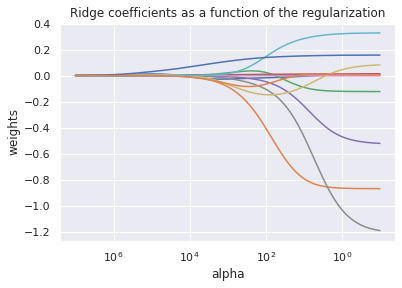

In [18]:
n_alphas = 200
alphas = np.logspace(-1, 7, n_alphas)

coefs = []
for a in alphas:
    ridge = linear_model.Ridge(alpha=a, fit_intercept=False)
    ridge.fit(X_train, y_train)
    coefs.append(ridge.coef_)

ax = plt.gca()

ax.plot(alphas, coefs)
ax.set_xscale('log')
ax.set_xlim(ax.get_xlim()[::-1])  # reverse axis
plt.xlabel('alpha')
plt.ylabel('weights')
plt.title('Ridge coefficients as a function of the regularization')
plt.axis('tight')
plt.show()